# Práctica 4: DFS Final
## Edwin Axel Vizuet Gil
### Objetivo

La siguiente práctica consiste en un programa elaborado en Python, el cual recorrerá un gráfico creado en un diccionario, almacenando el recorrido, indicando los caminos que tomó mediante busqueda DFS.

A diferencia de DFS simple y recursivo, **este código está hecho de tal manera que haga el recorrido evitando los bucles(ciclos) para llegar a la meta**; en este caso, el programa evalua los ciclos para evitarlos y continuar con el recorrido.

### Desarrollo
El siguiente código (gráfico2.py) contiene la creación de los gráficos a recorrer mediante un diccionario:

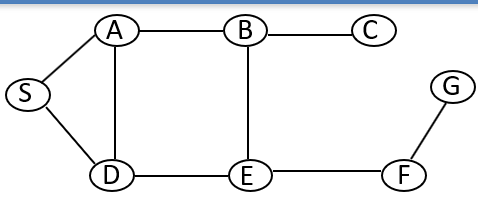

In [2]:
from IPython.core.display import Image
Image(filename ='/Users/AxelVizGil/Documents/Escuela/11vo_Cuatri/IA/S_to_G.png',width=400)

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 20 15:30:41 2018

@author: jlblancas
"""

#Conexiones entre lugares
conexion = {}
conexion["S"] = {"A", "D"}
conexion["A"] = {"B", "D"}
conexion["B"] = {"E", "C"}
conexion["C"] = {"B"} 
conexion["D"] = {"A", "E"}
conexion["E"] = {"D", "F"}
conexion["F"] = {"G"}
#localidades de los lugares

En dicho código, se crea un diccionario el cual contiene los nodos (lugares) que serán recorridos por el programa.

A continuación, se usan las clases Nodos y Estados para poder crear los objetos (instancias) correspondientes para almacenar los lugares y poder realizar el recorrido.

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  3 16:03:28 2018

@author: jlblancas
"""

class Nodo:
    '''
    Esta el nodo en la búsqueda de árbol/gráfico
    '''
    
    def __init__(self, estado):
        """
        Constructor
        """
        self.estado = estado
        self.profundidad = 0
        self.hijos = []
        self.limite = True
        self.padre = None
        
        
    def agregaHijos(self, nodoHijo):
        """
        Este método agrega un nodo debajo de otro nodo.
        """
        self.hijos.append(nodoHijo)
        nodoHijo.padre = self
        nodoHijo.profundidad = self.profundidad + 1
        
    
    def imprimeArbol(self):
        """
        Este método imprime un árbol.
        """
        print(self.profundidad , " - " , self.estado.lugar)
        for hijo in self.hijos:
            hijo.imprimeArbol()
 

En la clase Nodos, se ocupan los atributos y métodos correspondientes para poder crear los nodos correspondientes, así mismo, conforme se realice el recorrido se crearán los hijos dependiento al gráfico cargado.

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  3 16:13:22 2018

@author: jlblancas
"""


from grafico2 import conexion
from collections import OrderedDict
lista_de_listas = []
print("Valor inicial lista de listas : ",lista_de_listas)
print("Variable defined outside of method automatically global? "
      + str("lista_de_listas" in globals()))


class Estado:
    '''
    Esta clase obtiene la información del estado para nuestra aplicación de búsqueda.
    '''

    def __init__(self, lugar = None):
        if lugar == None:
            #create initial state
            self.lugar = self.obtenEstadoInicial()
        else:
            self.lugar = lugar

    def obtenEstadoInicial(self):
        """
        Este método retorna el directorio actual.
        """
        #estadoInicial = "Parada Autobus"
        estadoInicial = "S"
        #estadoInicial = os.path.dirname(os.path.realpath(__file__))
        return estadoInicial


    def funcionSucesora(self):
        """
        Esta es la función sucesora. Y genera todas las rutas
         rutas posibles que pueden ser alcanzadas de la ruta actual
        """
        global lista_de_listas
        print("NODO SUCESOR ::::> ",conexion[self.lugar])
        dictemp = {}
        dictemp = conexion[self.lugar]
        stack1 = []
        print("LISTA DE LISTAS %%%%%%%%",lista_de_listas)
        if conexion[self.lugar] in lista_de_listas:
            print("ESTADO REPETIDO ***********************")
            stack1 = list(dictemp)
            stack1.pop()
        else:
            stack1 = list(dictemp)
        stack1.sort()
        lista_de_listas.append(conexion[self.lugar])
        #print("Lista de Listas :::::>",lista_de_listas)
        
        #print(len(stack1))
        #print("STACK 1 : ",stack1) 
        #print("DICCIONARIO :::>",stack1)
        dictofWords2 = OrderedDict()
        for i in range(0,len(stack1)):
            dictofWords2[stack1[i]] = i+1
        #print(dictofWords2.keys())
        return dictofWords2.keys()

    def checaMeta(self):
        """
        Este método checa si en la ruta esta el estado meta.
        """
        #check if it is a folder
        #return self.lugar == "Laboratorios Computo"
        return self.lugar == "G"

ModuleNotFoundError: No module named 'grafico2'

En este código (Estados), se contienen los métodos correspondientes los cuales identificaran los lugares en los que están posicionados los nodos según el gráfico. La función sucesora es de los métodos más importantes, debido a que regresa los hijos del nodo actual.
De igual manera, se contienen los arreglos para hacer que no caiga en un ciclo infinito y pueda seguir buscando la solución.

In [4]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 24 09:50:25 2018

@author: jlblancas
"""

from Nodod import Nodo
from Estadod import Estado



def DFS():
    """
    This function performs DFS search using a stack
    """
    #create stack
    stack = []
    visited = [] 
   
    
    #crear el nodo raiz y agregar al stack
    estadoInicial = Estado()
    raiz = Nodo(estadoInicial)
    print("-- Nodo Raiz --", raiz.estado.lugar)
    print("Atributos Raiz ", raiz.estado.__dict__,raiz.__dict__)
    stack.append(raiz)
    for x in stack:
        print('Valor del Stack ', x.estado.__dict__)
    cont = 0
   
    # checar si hay algo en el stack a expandir
    while len(stack) > 0:
        
        #obtener el nodo siguiente
        nodoActual = stack.pop()
        if nodoActual.estado.lugar not in visited:
            visited.append(nodoActual.estado.lugar)
        
        print("-- pop --", nodoActual.estado.lugar)
        if len(visited) == 0:
            print('Valor del Visited++++++++ CERO')
        for x in visited:
            print('Valor del Visited******** ', visited)
        
        #checar si estamos en el estado meta
        if nodoActual.estado.checaMeta():
            print("Meta Alcanzada")
            break
            
        #obtener los nodos hijos del nodo actual que estamos revisando
        childStates = nodoActual.estado.funcionSucesora()
        print('Child States ????????? ',childStates)
        for childState in childStates:
            childNode = Nodo(Estado(childState))
            print('Nodo Hijo ',childNode.estado.lugar)
            if childNode.estado.lugar not in visited:
                print('Nodo Hijo vs VISITED ',nodoActual.estado.lugar)
                nodoActual.agregaHijos(childNode)
                #Añadir hijos si no ha sido visitado
        
        
        
        #agregar a los hijos en orden inverso al stack // for index in range(len(nodoActual.hijos) - 1, -1, -1):
        for index in range(len(nodoActual.hijos)-1,-1,-1):
            if nodoActual.hijos[index] not in visited:
                stack.append(nodoActual.hijos[index])
                
        
        if len(stack) == 0:
            print('Valor del Stack¬¬¬¬¬¬¬¬¬¬¬ CERO')
        for x in stack:
            print('Valor del Stack∞∞∞∞∞∞∞∞∞∞∞∞ ', x.estado.__dict__)
                
        #print("NODOS VISITADOS ::>",visited)
        #mostrar el arbol explorado hasta el momento
        cont = cont +1
        print("CONTADOR", cont)
        
    print("----------------------")
    raiz.imprimeArbol()
    
DFS()

ModuleNotFoundError: No module named 'Nodod'

#### Diferencias vs DFS simple
+ Esté código elimina los ciclos dentro de cada gráfico, esto para poder encontrar la solución dentro del árbol.

### Conclusión


DFS es un método de búsqueda sencillo de implementar, pero tiene algunas desventajas:

+ Puede ciclarse si no se declaran bien los gráficos.
+ Si el gráfico tiene nodos terminales, en caso de no ser la salida, no podrá regresar.
+ Este código funciona para pocos gráficos, no para muchos casos.


**Sin embargo, esta nueva implementación conviene más, debido a que ahora muestra un recorrido más completo, eliminando los ciclos dentro de un árbol.**